In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")

!pip install plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

df = pd.read_csv(
    
    '/home/maderles/my_project_dir/IMDb movies.csv'

)

In [2]:
df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


In [3]:
df.tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN
81272,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,7.2,190,NaN,NaN,$ 2833,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          81273 non-null  object 
 1   title                  81273 non-null  object 
 2   original_title         81273 non-null  object 
 3   year                   81273 non-null  int64  
 4   date_published         81273 non-null  object 
 5   genre                  81273 non-null  object 
 6   duration               81273 non-null  int64  
 7   country                81234 non-null  object 
 8   language               80518 non-null  object 
 9   director               81200 non-null  object 
 10  writer                 79780 non-null  object 
 11  production_company     76948 non-null  object 
 12  actors                 81207 non-null  object 
 13  description            78843 non-null  object 
 14  avg_vote               81273 non-null  float64
 15  vo

In [5]:

df['usa_gross_income'] = df['usa_gross_income'].fillna(0)
df['reviews_from_users'] = df['reviews_from_users'].fillna(0)
df['metascore'] = df['metascore'].fillna(0)
df['reviews_from_critics'] = df['reviews_from_critics'].fillna(0)
df['worlwide_gross_income'] = df['worlwide_gross_income'].fillna(0)
df['budget'] = df['budget'].fillna(0)


In [6]:
df.isnull().sum()

imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration                    0
country                    39
language                  755
director                   73
writer                   1493
production_company       4325
actors                     66
description              2430
avg_vote                    0
votes                       0
budget                      0
usa_gross_income            0
worlwide_gross_income       0
metascore                   0
reviews_from_users          0
reviews_from_critics        0
dtype: int64

In [7]:
df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,0,0,0.0,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,0,0,0,0.0,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,0,0,0.0,24.0,3.0


In [8]:
fig = px.histogram(data_frame=df.sort_values(by='year'), x='year', 
                   color_discrete_sequence=['gold'])

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text='<b>Distributions of IMBD movies from<b> 1913 - now',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis = dict(title='Year of release', showgrid=False),
                 yaxis=dict(showgrid=False))

In [9]:
df['genre'].unique()[:]

array(['Biography, Crime, Drama', 'Drama', 'Drama, History', ...,
       'Crime, Mystery, Western', 'Adventure, History, Sci-Fi',
       'Animation, Music'], dtype=object)

In [10]:
tmp_genre = df['genre']

In [11]:
df['genre2'] = df['genre'].apply(lambda text: text.split(',')[0])
df.drop(columns='genre', inplace=True)
df['genre2'].value_counts()

Drama          23904
Comedy         23125
Action         11370
Crime           5229
Horror          4909
Adventure       3391
Animation       1985
Biography       1979
Thriller        1293
Romance          742
Western          628
Family           615
Mystery          581
Fantasy          480
Sci-Fi           412
Musical          323
War              102
History           80
Music             71
Film-Noir         34
Sport             16
Adult              2
Documentary        2
Name: genre2, dtype: int64

In [12]:
#pour les notes

<AxesSubplot:>

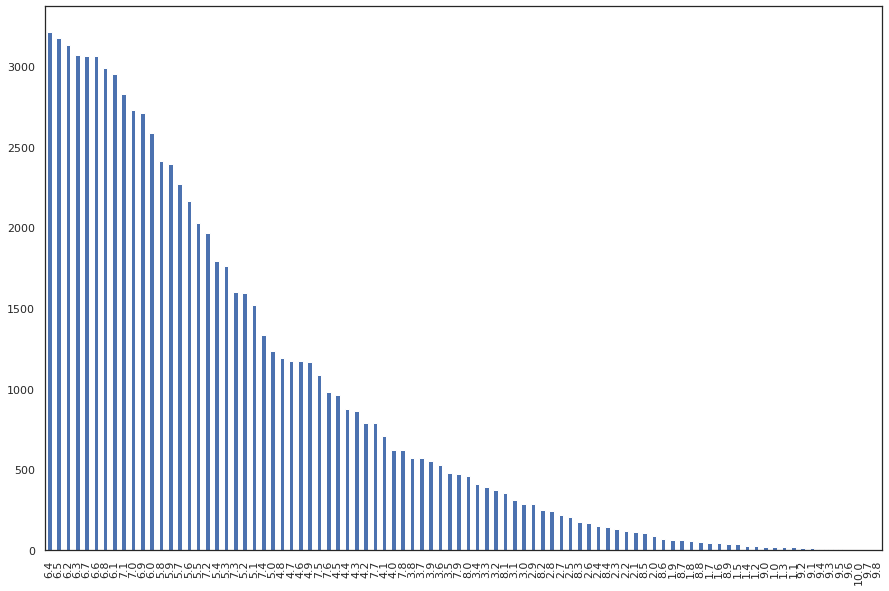

In [13]:
fig = plt.gcf()
fig.set_size_inches(15,10)
df['avg_vote'].value_counts().plot.bar(fig)

<AxesSubplot:xlabel='avg_vote', ylabel='Density'>

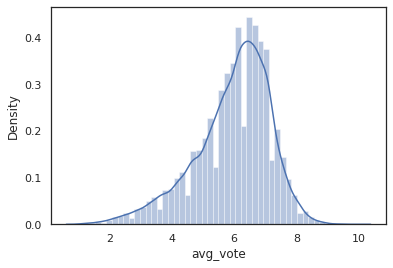

In [14]:
df.dropna(inplace=True)
sns.distplot(df['avg_vote'])

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

2022-06-18 17:46:02.221625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 17:46:02.221645: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
test = df

In [17]:
test.head()

,imdb_title_id,title,original_title,year,date_published,duration,country,language,director,writer,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,genre2
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,100,USA,English,Charles L. Gaskill,Victorien Sardou,...,The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,0,0,0.0,24.0,3.0,Drama
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,Loosely adapted from Dante's Divine Comedy and...,7.0,2019,0,0,0,0.0,28.0,14.0,Adventure
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,60,USA,English,Sidney Olcott,Gene Gauntier,...,"An account of the life of Jesus Christ, based ...",5.7,438,0,0,0,0.0,12.0,5.0,Biography
5,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",...,"The story of Madame DuBarry, the mistress of L...",6.8,709,0,0,0,0.0,11.0,9.0,Biography
6,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,120,Italy,Italian,Enrico Guazzoni,"Henryk Sienkiewicz, Enrico Guazzoni",...,"An epic Italian film ""Quo Vadis"" influenced ma...",6.2,241,ITL 45000,0,0,0.0,6.0,4.0,Drama


In [18]:
test.drop(columns=["original_title","date_published","duration","country","language","director","writer","description","avg_vote","votes","budget","usa_gross_income","worlwide_gross_income","metascore","reviews_from_users","reviews_from_critics","actors","production_company"],inplace=True)

In [19]:
test

,imdb_title_id,title,year,genre2
2,tt0002101,Cleopatra,1912,Drama
3,tt0002130,L'Inferno,1911,Adventure
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,Biography
5,tt0002423,Madame DuBarry,1919,Biography
6,tt0002445,Quo Vadis?,1913,Drama
...,...,...,...,...
81265,tt9896916,The Pilgrim's Progress,2019,Animation
81267,tt9900782,Kaithi,2019,Action
81268,tt9903716,Jessie,2019,Horror
81269,tt9905412,Ottam,2019,Drama


In [20]:
test = test.assign(Drama = 0)
test = test.assign(Comedy = 0)
test = test.assign(Action = 0)
test = test.assign(Crime = 0)
test = test.assign(Horror = 0)
test = test.assign(Adventure = 0)
test = test.assign(Animation = 0)
test = test.assign(Biography = 0)
test = test.assign(Thriller = 0)
test = test.assign(Romance = 0)
test = test.assign(Family = 0)
test = test.assign(Mystery = 0)
test = test.assign(Fantasy = 0)
test = test.assign(Sci_Fi = 0)
test = test.assign(Musical = 0)
test = test.assign(War = 0)
test = test.assign(History = 0)
test = test.assign(Music = 0)
test = test.assign(Film_Noir = 0)
test = test.assign(Sport = 0)
test = test.assign(Adult = 0)
test = test.assign(Documentary = 0)
test = test.assign(Western = 0)


In [21]:
test.head()

,imdb_title_id,title,year,genre2,Drama,Comedy,Action,Crime,Horror,Adventure,...,Sci_Fi,Musical,War,History,Music,Film_Noir,Sport,Adult,Documentary,Western
2,tt0002101,Cleopatra,1912,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0002130,L'Inferno,1911,Adventure,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,Biography,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0002423,Madame DuBarry,1919,Biography,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt0002445,Quo Vadis?,1913,Drama,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test.loc[test['genre2'] == 'Drama', 'Drama'] = 1
test.loc[test['genre2'] == 'Comedy', 'Comedy'] = 1
test.loc[test['genre2'] == 'Action', 'Action'] = 1
test.loc[test['genre2'] == 'Crime', 'Crime'] = 1
test.loc[test['genre2'] == 'Horror', 'Horror'] = 1
test.loc[test['genre2'] == 'Adventure', 'Adventure'] = 1
test.loc[test['genre2'] == 'Animation', 'Animation'] = 1
test.loc[test['genre2'] == 'Biography', 'Biography'] = 1
test.loc[test['genre2'] == 'Thriller', 'Thriller'] = 1
test.loc[test['genre2'] == 'Romance', 'Romance'] = 1
test.loc[test['genre2'] == 'Western', 'Western'] = 1
test.loc[test['genre2'] == 'Sci-Fi', 'Sci_Fi'] = 1
test.loc[test['genre2'] == 'Fantasy', 'Fantasy'] = 1
test.loc[test['genre2'] == 'Musical', 'Musical'] = 1
test.loc[test['genre2'] == 'War', 'War'] = 1
test.loc[test['genre2'] == 'History', 'History'] = 1
test.loc[test['genre2'] == 'Music', 'Music'] = 1
test.loc[test['genre2'] == 'Film-Noir', 'Film_Noir'] = 1
test.loc[test['genre2'] == 'Sport', 'Sport'] = 1
test.loc[test['genre2'] == 'Documentary', 'Documentary'] = 1
test.loc[test['genre2'] == 'Adult', 'Drama'] = 1

In [23]:
test.head(3000)

,imdb_title_id,title,year,genre2,Drama,Comedy,Action,Crime,Horror,Adventure,...,Sci_Fi,Musical,War,History,Music,Film_Noir,Sport,Adult,Documentary,Western
2,tt0002101,Cleopatra,1912,Drama,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0002130,L'Inferno,1911,Adventure,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,Biography,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0002423,Madame DuBarry,1919,Biography,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt0002445,Quo Vadis?,1913,Drama,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,tt0031981,The Story of Alexander Graham Bell,1939,Biography,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3240,tt0031983,The Story of Vernon and Irene Castle,1939,Biography,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3241,tt0031988,Stronger Than Desire,1939,Drama,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3242,tt0031995,Susannah of the Mounties,1939,Drama,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:

from tqdm import tqdm_notebook as tqdm
width = 350
height = 350
X = []
for i in tqdm(range(test.shape[0])):
    path = 'home/maderles/my_project_dir/Movie_Poster_Dataset/test/'+test['imdb_title_id'][i]+'.jpg'
    img = image.load_img(path,target_size=(width,height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

/tmp/ipykernel_97591/2066369169.py:5: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/73102 [00:00<?, ?it/s]

KeyError: 0

In [ ]:
print(range(test.shape[0]))

In [ ]:
import os

from tqdm import tqdm_notebook as tqdm
image_paths = []
image_names = []
image_dir = "/home/maderles/my_project_dir/Movie_Poster_Dataset/test/"
for image_name in tqdm(os.listdir(image_dir)) : 
    image_path = image_dir + image_name
    image_paths.append(image_path)
    image_names.append(image_name)
    img = image.load_img(image_path,target_size=(width,height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

/tmp/ipykernel_97591/3351841126.py:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/8052 [00:00<?, ?it/s]